In [2]:
import fidA_io as fio
from fidA_processing import *

In [12]:
out1,ref1,infodict=fio.io_loadspec_bruk('data/6',try_raw=True)
print(out1.dims)
print(out1.flags)

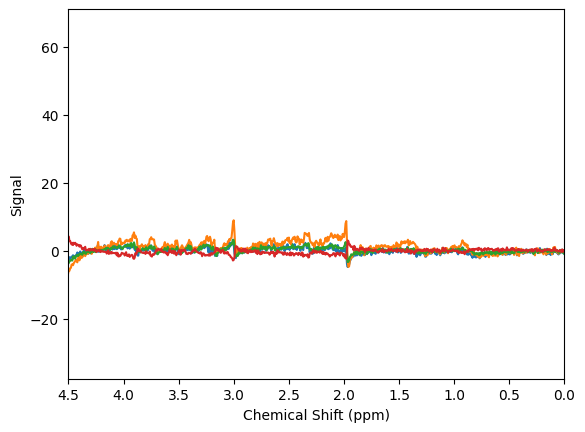

In [19]:
out1.plot_spec()

In [27]:
fid1_cc=fop.op_addrcvrs(out1)